# Corrugated Shells geometry

## Init symbols for *sympy*

In [20]:
from sympy import *
from geom_util import *
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

%matplotlib inline

%reload_ext autoreload
%autoreload 2
%aimport geom_util

In [21]:
# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (12, 12)

    
plt.rc('text', usetex=True)
    
plt.rc('font', family='serif')
# SMALL_SIZE = 42
# MEDIUM_SIZE = 42
# BIGGER_SIZE = 42
    
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

init_printing()

In [22]:
N = CoordSys3D('N')
alpha1, alpha2, alpha3 = symbols("alpha_1 alpha_2 alpha_3", real = True, positive=True)

## Cylindrical coordinates

In [23]:
R, L, ga, gv = symbols("R L g_a g_v", real = True, positive=True)

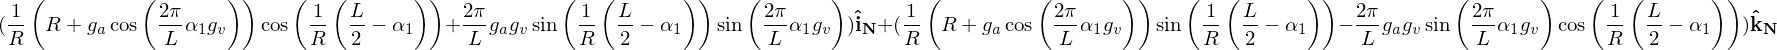

In [24]:
a1 = pi / 2 + (L / 2 - alpha1)/R

a2 = 2 * pi * alpha1 / L

x1 = (R + ga * cos(gv * a2)) * cos(a1)
x2 = alpha2
x3 = (R + ga * cos(gv * a2)) * sin(a1)

r = x1*N.i + x2*N.j + x3*N.k

r1=r.diff(alpha1)
r1

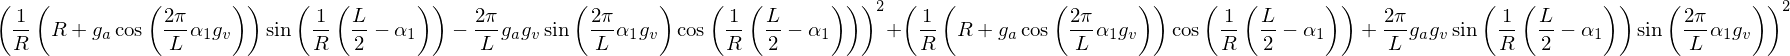

In [25]:
A = r1.dot(r1)
A

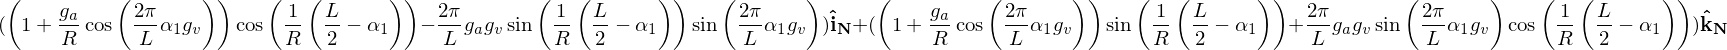

In [51]:
z = 2*ga*gv*pi/L*sin(gv*a2)
w = 1 + ga/R*cos(gv*a2)

dr1x=(z*cos(a1) + w*sin(a1))
dr1z=(z*sin(a1) - w*cos(a1))

r1 = dr1x*N.i + dr1z*N.k
r2 =N.j

mag=sqrt((w)**2+(z)**2)

nx = -dr1z/mag
nz = dr1x/mag

n = nx*N.i+nz*N.k

dnx=nx.diff(alpha1)
dnz=nz.diff(alpha1)

dn= dnx*N.i+dnz*N.k

r1

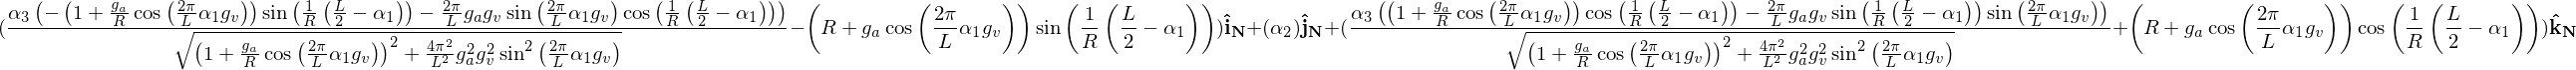

In [52]:
Ralpha = r+alpha3*n

R1=r1+alpha3*dn
R2=Ralpha.diff(alpha2)
R3=n

Ralpha

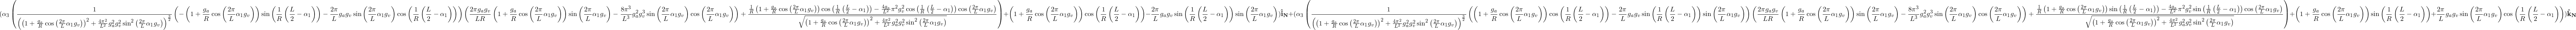

In [29]:
R1

In [30]:
R2

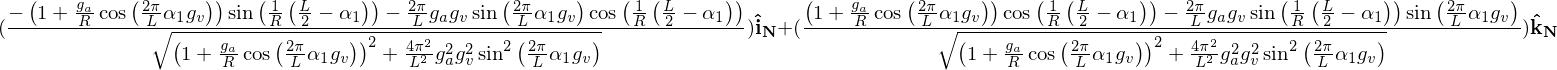

In [31]:
R3

### Draw

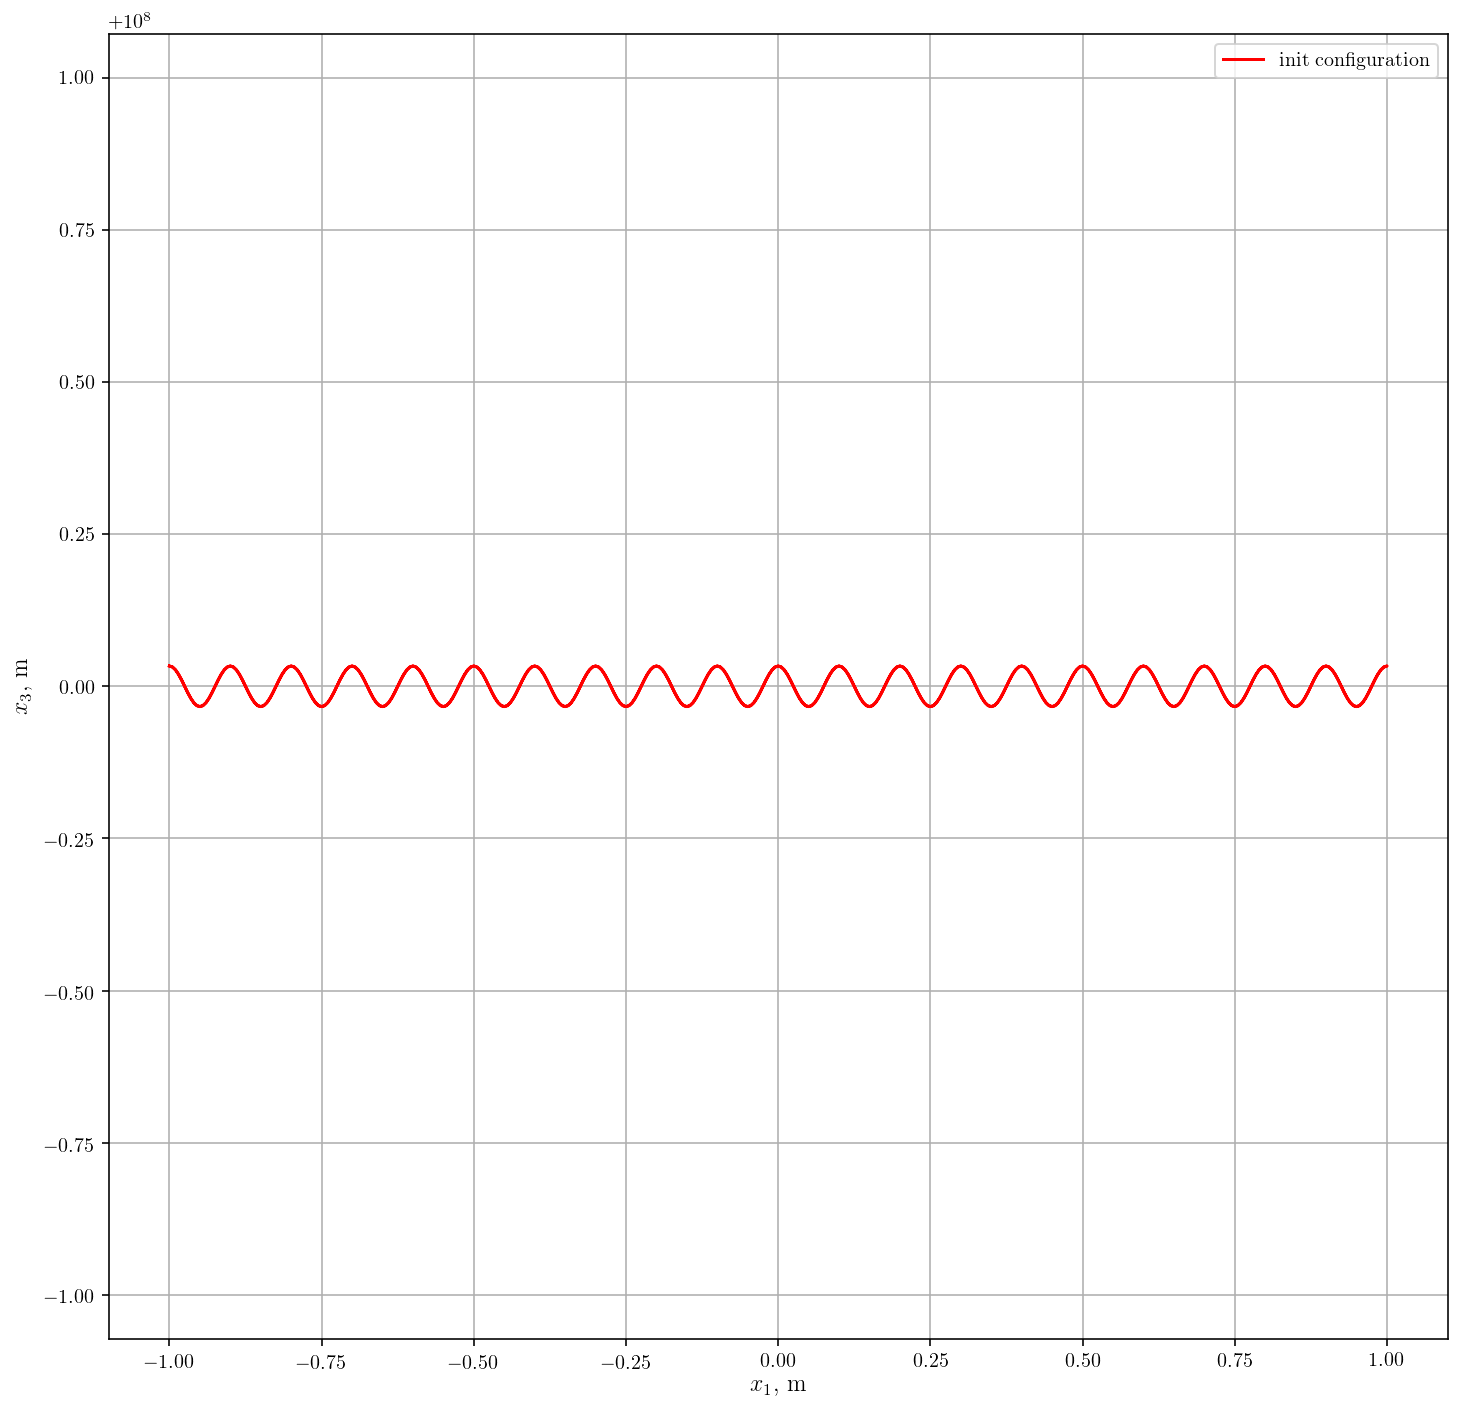

In [50]:
import plot

%aimport plot

# x1 = (R + alpha3 + ga * cos(gv * a2)) * cos(a1)
# x2 = alpha2
# x3 = (R + alpha3 + ga * cos(gv * a2)) * sin(a1)

x1 = Ralpha.dot(N.i)
x3 = Ralpha.dot(N.k)

alpha1_x = lambdify([R, L, ga, gv, alpha1, alpha3], x1, "numpy")
alpha3_z = lambdify([R, L, ga, gv, alpha1, alpha3], x3, "numpy")

R_num = 1/0.00000001
L_num = 2
h_num = 0.1
ga_num = h_num/3
gv_num = 20

x1_start = 0
x1_end = L_num
x3_start = -h_num/2
x3_end = h_num/2

def alpha_to_x(a1, a2, a3):
    x=alpha1_x(R_num, L_num, ga_num, gv_num, a1, a3)
    z=alpha3_z(R_num, L_num, ga_num, gv_num, a1, a3)
    return x, 0, z
    

plot.plot_init_geometry_2(x1_start, x1_end, x3_start, x3_end, alpha_to_x)

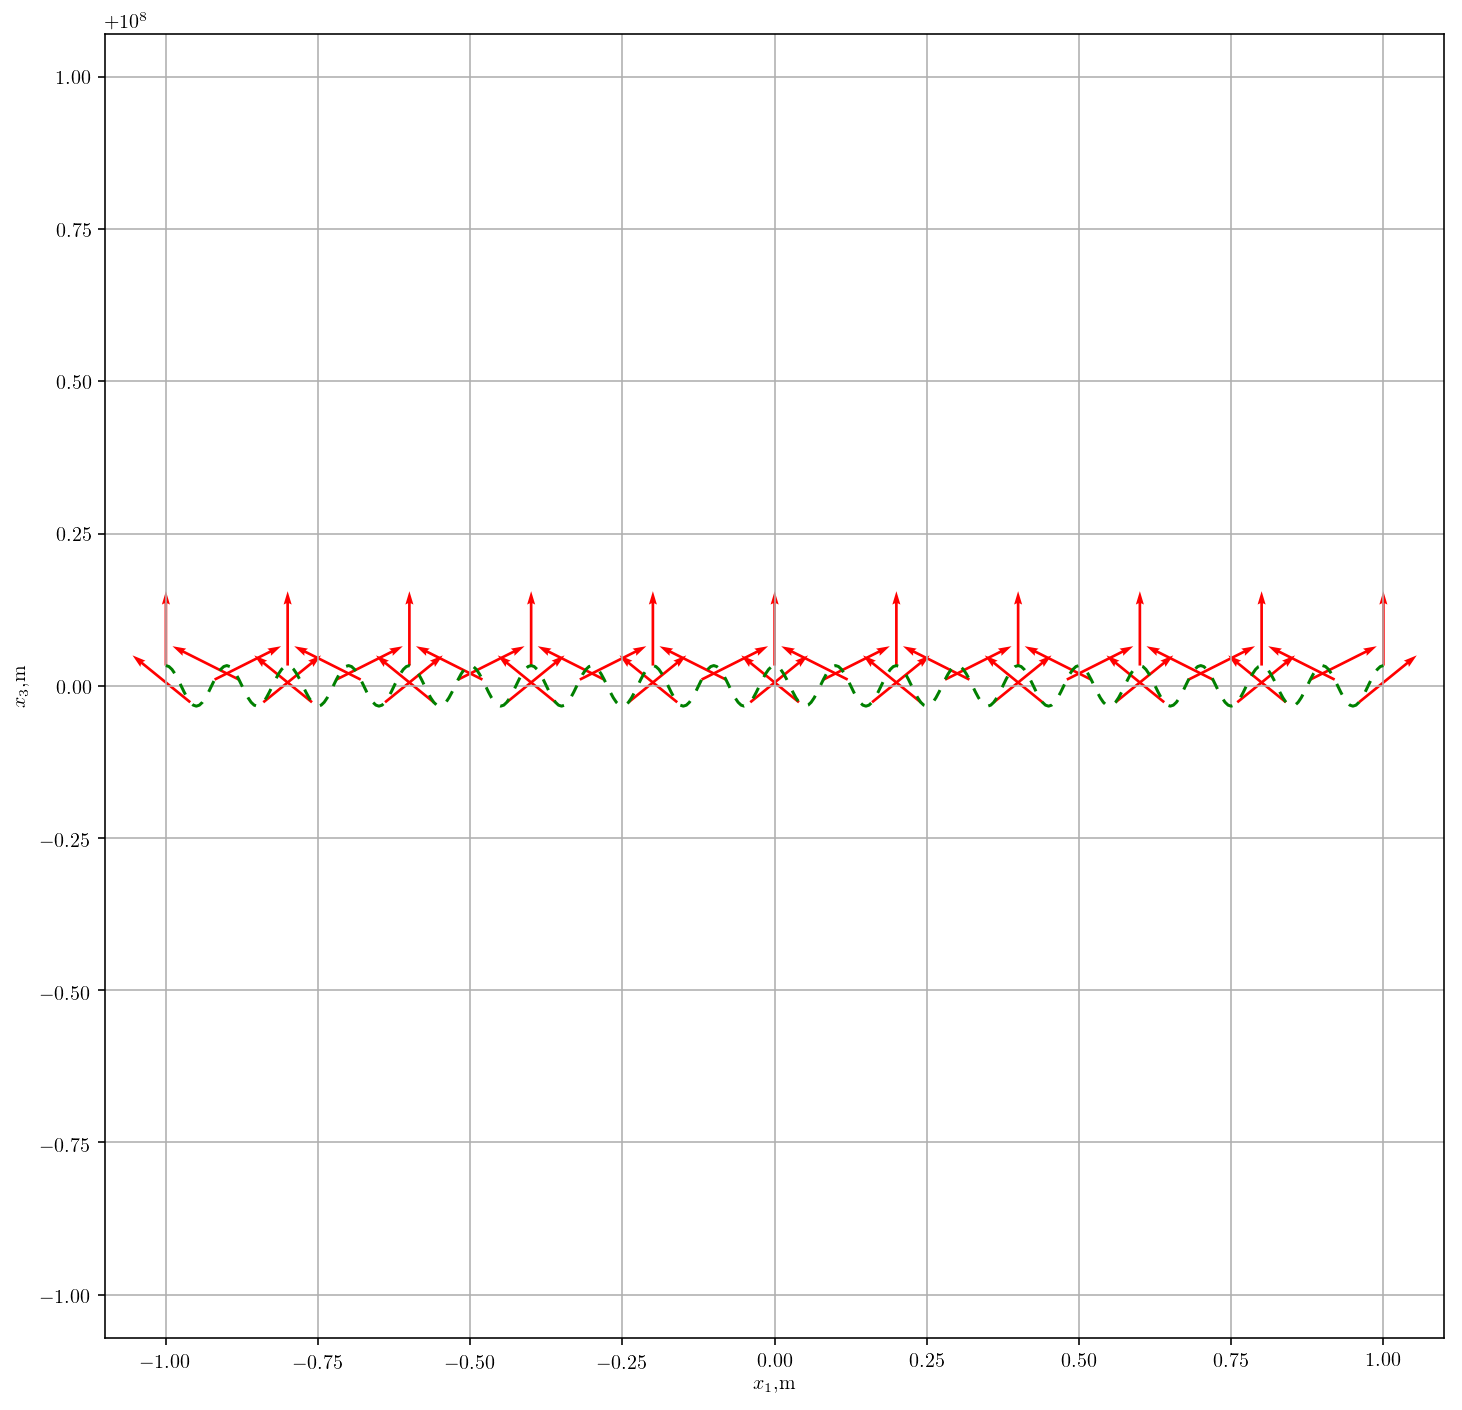

In [46]:
%aimport plot

R3_1=R3.dot(N.i)
R3_3=R3.dot(N.k)

R3_1_x = lambdify([R, L, ga, gv, alpha1, alpha3], R3_1, "numpy")
R3_3_z = lambdify([R, L, ga, gv, alpha1, alpha3], R3_3, "numpy")

def R3_to_x(a1, a2, a3):
    x=R3_1_x(R_num, L_num, ga_num, gv_num, a1, a3)
    z=R3_3_z(R_num, L_num, ga_num, gv_num, a1, a3)
    return x, 0, z

plot.plot_vectors(x1_start, x1_end, 0, alpha_to_x, R3_to_x)

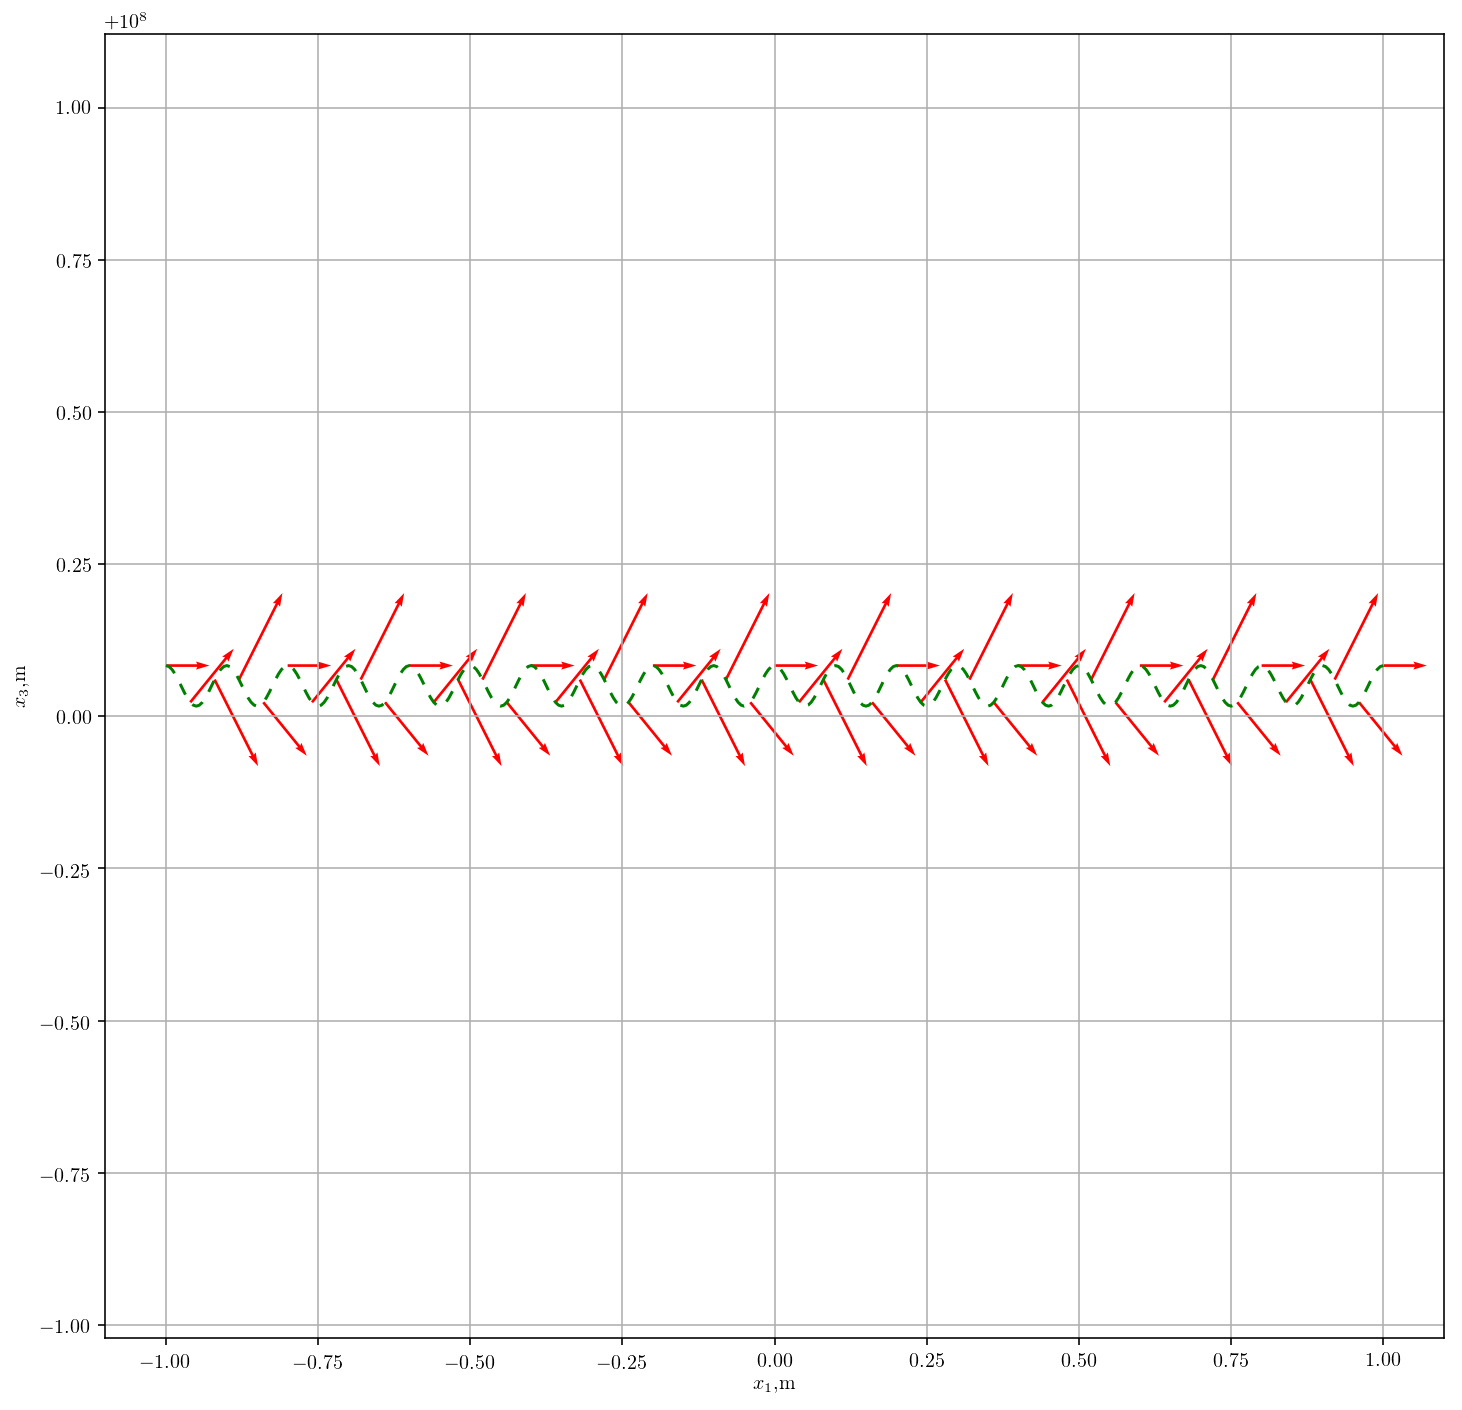

In [48]:
%aimport plot

R1_1=r1.dot(N.i)
R1_3=r1.dot(N.k)

R1_1_x = lambdify([R, L, ga, gv, alpha1, alpha3], R1_1, "numpy")
R1_3_z = lambdify([R, L, ga, gv, alpha1, alpha3], R1_3, "numpy")

def R1_to_x(a1, a2, a3):
    x=R1_1_x(R_num, L_num, ga_num, gv_num, a1, a3)
    z=R1_3_z(R_num, L_num, ga_num, gv_num, a1, a3)
    return x, 0, z

plot.plot_vectors(x1_start, x1_end, h_num/2, alpha_to_x, R1_to_x)

### Lame params

In [ ]:
H1 = sqrt((alpha3*((-(1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*sin((L/2 - alpha1)/R) - ga*gv*sin(gv*(pi/2 + (L/2 - alpha1)/R))*cos((L/2 - alpha1)/R)/R)*(-ga*gv*(1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*sin(gv*(pi/2 + (L/2 - alpha1)/R))/R**2 + ga**2*gv**3*sin(gv*(pi/2 + (L/2 - alpha1)/R))*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R**3)/((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)**2 + ga**2*gv**2*sin(gv*(pi/2 + (L/2 - alpha1)/R))**2/R**2)**(3/2) + ((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*cos((L/2 - alpha1)/R)/R + ga*gv**2*cos((L/2 - alpha1)/R)*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R**2 - 2*ga*gv*sin((L/2 - alpha1)/R)*sin(gv*(pi/2 + (L/2 - alpha1)/R))/R**2)/sqrt((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)**2 + ga**2*gv**2*sin(gv*(pi/2 + (L/2 - alpha1)/R))**2/R**2)) + (1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*cos((L/2 - alpha1)/R) - ga*gv*sin((L/2 - alpha1)/R)*sin(gv*(pi/2 + (L/2 - alpha1)/R))/R)**2 + (alpha3*(((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*cos((L/2 - alpha1)/R) - ga*gv*sin((L/2 - alpha1)/R)*sin(gv*(pi/2 + (L/2 - alpha1)/R))/R)*(-ga*gv*(1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*sin(gv*(pi/2 + (L/2 - alpha1)/R))/R**2 + ga**2*gv**3*sin(gv*(pi/2 + (L/2 - alpha1)/R))*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R**3)/((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)**2 + ga**2*gv**2*sin(gv*(pi/2 + (L/2 - alpha1)/R))**2/R**2)**(3/2) + ((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*sin((L/2 - alpha1)/R)/R + ga*gv**2*sin((L/2 - alpha1)/R)*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R**2 + 2*ga*gv*sin(gv*(pi/2 + (L/2 - alpha1)/R))*cos((L/2 - alpha1)/R)/R**2)/sqrt((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)**2 + ga**2*gv**2*sin(gv*(pi/2 + (L/2 - alpha1)/R))**2/R**2)) + (1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*sin((L/2 - alpha1)/R) + ga*gv*sin(gv*(pi/2 + (L/2 - alpha1)/R))*cos((L/2 - alpha1)/R)/R)**2)
H2=S(1)
H3=S(1)

H=[H1, H2, H3]
DIM=3
dH = zeros(DIM,DIM)
for i in range(DIM):
    dH[i,0]=H[i].diff(alpha1)
    dH[i,1]=H[i].diff(alpha2)
    dH[i,2]=H[i].diff(alpha3)
    
    
trigsimp(H1)
    